<a href="https://colab.research.google.com/github/KMate-ISD/Machine_learning/blob/main/Jupyter_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Jupyter/Python practice

### General / LaTeX
#### Tables

||Item A|Item B|
|:-|-:|-:|
|`set A`|233|103|
|`set B`|244|89|

#### normális eloszlás standardizációja

### $$\phi: N(0, 1)$$
$$F(x)\to\phi(\frac{x-m}{\sigma})$$

#### és sűrűségfüggvénye:

$$f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(t-m)^2}{2\sigma^2}}$$

In [ ]:
import sys
sys.version_info

### String interpolation

In [ ]:
k=math.e
num='number'

#f'{bool(15)}'

print("The %s stored as 'k' is %+10.5F sample text" % (num, k))
print("The {0} stored as 'k' is {1:+10.5F} sample text".format(num, k))
print("The {n} stored as 'k' is {k:+10.5F} sample text".format(n=num, k=k))

# Python 3.6+
print(f"The {num} stored as 'k' is {k:+10.5f} sample text")

### Ciklusok

In [ ]:
# skaláris szorzat

lista=[1,2,3]
listb=[2,2,2,8]
dotProduct=0.

# feltéve, hogy a hiányzó koordináták 0-nak vehetők abban a dimenzióban

shorterLength=min(len(lista),len(listb))

for i in range(shorterLength):
  if i < shorterLength:
    dotProduct+=lista[i]*listb[i]

print(f'{dotProduct:.2f}')

### Dictionaries

In [ ]:
dict={'a':1,'b':2,'c':3}

for letter, number in dict.items():
  print(f'The corresponding value for key {letter} is {number:02b}.')

### Functions, methods

In [ ]:
# List functions and methods of a class via .dir

import math

i = 0
for command in dir(math):
  i += 1
  print(f'{i:3}: {command}')

In [ ]:
# tapasztalati / korrigált tapasztalati szórás tuple-lel

def stdev_population_sample(sample):
  n=len(sample)

  average=0.0
  for item in sample:
    average+=item
  average/=n

  stdev_population=0.0
  stdev_sample=0.0
  for item in sample:
    stdev_population+=pow(average-item,2)
  stdev_sample=stdev_population

  stdev_population/=n
  stdev_sample/=n-1

  return(math.sqrt(stdev_population), math.sqrt(stdev_sample))

stdev_population_sample([23,26,25,19,23,28,25,25])


### Classes, OOP

In [51]:
import math

class Sample(object):
  def __init__(self, description):
    self.__description=description
    self.__is_mean_changed=False
    self.__is_variance_changed=False
    self.__is_stdev_changed=False
    self.__items=[]
    self.__items_new=[]
    self.__items_new_count=0
    self.__mean=0.0
    self.__variance=0.0
    self.__stdev=0.0

  def __str__(self):
    return f'{self.get_description()}\nSample size: {self.get_sample_size():11d}\nSample mean: {self.calculate_sample_mean():11.3f}\nSample stDev: {self.calculate_standard_deviation():10.3f}'
  
  def add_sample_item(self, item):
    self.__items_new.append(item)
    self.__is_mean_changed=True
    self.__is_variance_changed=True
    self.__is_stdev_changed=True

  def calculate_sample_mean(self):
    if self.__is_mean_changed==True:
      n=self.get_sample_size()
      k=self.__items_new_count
      sum=self.__mean*(n-k)
      for i in range(k):
        sum+=self.get_sample()[-i-1]
      self.__mean=sum/n
      self.__items_new_count=0
      self.__is_mean_changed=False
    return self.__mean

  # Korrigált empírikus szórásnégyzet, ha a mintanagyság < 20
  def calculate_variance(self):
    if self.__is_variance_changed==True:
      n=self.get_sample_size()
      mean=self.calculate_sample_mean()
      sum_of_squares=0
      for i in range(n):
        sum_of_squares+=math.pow(mean-self.get_sample()[i],2)
      if n < 20:
        self.__variance=sum_of_squares/(n-1)
      else:
        self.__variance=sum_of_squares/n
      self.__is_variance_changed=False
    return self.__variance
  
  def calculate_standard_deviation(self):
    if self.__is_stdev_changed==True:
      self.__stdev=math.pow(self.calculate_variance(),0.5)
      self.__is_stdev_changed=False
    return self.__stdev

  def clear_sample(self):
    self.__items.clear()
    self.__items_new.clear()
    self.__items_new_count=0
    self.__mean=0.0
    self.__variance=0.0
    self.__stdev=0.0
    self.__is_mean_changed=False
    self.__is_variance_changed=False
    self.__is_stdev_changed=False

  def get_description(self):
    return self.__description
  
  def get_sample(self):
    k=len(self.__items_new)
    if k > 0:
      self.__items.extend(self.__items_new)
      self.__items_new_count+=k
      self.__items_new.clear()
    return self.__items

  def get_sample_size(self):
    return len(self.get_sample())

### Test Sample class

In [52]:

import random
import time

spl=Sample('This is a test sample')
spl.clear_sample()

experiment=[]
experiment_alt=[]
for i in range(1000000):
  experiment.append(random.randrange(158,193))
  experiment_alt.append(random.randrange(151,196))

for outcome in experiment:
  spl.add_sample_item(outcome)

def timing_method():
  tick_start=time.perf_counter()
  print(f'\n{spl}')
  tick_end=time.perf_counter()
  time_elapsed=tick_end-tick_start
  print(f'Time elapsed: {time_elapsed:10.3f}')

%time
timing_method()

# hatékonyság tesztelése (caching)
for outcome in experiment_alt:
  spl.add_sample_item(outcome)

timing_method()
timing_method()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 10 µs

This is a test sample
Sample size:     1000000
Sample mean:     175.006
Sample stDev:     10.108
Time elapsed:      0.831

This is a test sample
Sample size:     2000000
Sample mean:     174.004
Sample stDev:     11.681
Time elapsed:      1.290

This is a test sample
Sample size:     2000000
Sample mean:     174.004
Sample stDev:     11.681
Time elapsed:      0.000


### I/O

In [ ]:
v='sample variable'

# Open file and close after. 'w' or 'r' sepcifies 'writing' or 'reading'.
with open('jptr_log.txt', 'w') as file:
  file.write(f'line 1: {v}\n')
  file.write("Don't forget to add the line break!\n")

with open('jptr_log.txt', 'r') as file:
  print(file.readline().strip())
  print(file.readline())

with open('jptr_log.txt', 'r') as file:
  print(file.readlines())

### matplotlib

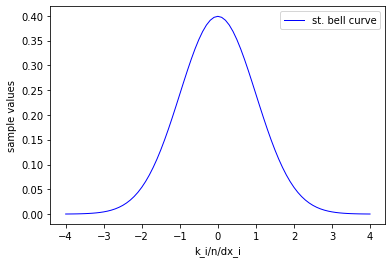

In [49]:
import matplotlib.pyplot as plt
import math

x=[i*0.1 for i in range(-40,41)]

def standardize_value(x):
  return 1/math.pow(2*math.pi, 0.5)*math.pow(math.e, (-math.pow(x, 2)/2))

standard_normal_distribution=[standardize_value(i) for i in x]
plt.plot(x, standard_normal_distribution, label='st. bell curve', color='blue', linewidth=1)
plt.xlabel('k_i/n/dx_i')
plt.ylabel('sample values')
plt.legend(loc='upper right')
plt.show()